In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
import plotly.express as px

df = pd.read_csv('languagelist.csv')
df

,Language,Total Speakers,Native Speakers,Origin
0,English,1132366680,379007140.0,Indo-European
1,Mandarin Chinese,1116596640,917868640.0,Sino-Tibetan
2,Hindi,615475540,341208640.0,Indo-European
3,Spanish,534335730,460093030.0,Indo-European
4,French,279821930,77177210.0,Indo-European
...,...,...,...,...
95,Cameroonian Pidgin,12000000,NaN,Indo-European
96,Sylheti,11800000,10300000.0,Indo-European
97,South Levantine Spoken Arabic,11601100,11601100.0,Afro-Asiatic
98,Tunisian Spoken Arabic,11571600,11571600.0,Afro-Asiatic


In [5]:
job_title = df['Total Speakers'].tolist()
print(type(job_title))
print(job_title)

<class 'list'>
[1132366680, 1116596640, 615475540, 534335730, 279821930, 273989700, 265042480, 258227760, 234168620, 198733600, 170208780, 132176520, 128350830, 98327740, 95312800, 93040340, 92725700, 81501290, 80989130, 79779360, 77264890, 76950770, 73538610, 68277600, 67894920, 64618100, 63428100, 60657660, 60588970, 56463310, 52782160, 52405300, 50462190, 48467490, 46900000, 45000000, 42912350, 40378030, 39844260, 38051547, 37829870, 37300000, 34085000, 33082790, 32608700, 32601140, 32400000, 32387600, 31940300, 30000000, 27779100, 27014190, 25880630, 25164820, 24615591, 24587400, 24528840, 24345750, 23808890, 23069480, 22400000, 22100000, 20850900, 20746400, 20009000, 19183300, 19092180, 17591230, 17534580, 17287880, 16321530, 16300000, 15942480, 15655900, 15329040, 15000000, 14605670, 14524500, 14485000, 14359000, 14102320, 13813750, 13731000, 13664710, 13524520, 13386850, 13170460, 13000000, 12934060, 12804900, 12800000, 12574280, 12486000, 12131225, 12120250, 12000000, 11800000,

In [8]:
import plotly.express as px

most_total = df.sort_values(by='Total Speakers', ascending=False)
top_20 = most_total.head(20)

fig = px.bar(top_20, x='Language', y='Total Speakers', title='Breakdown of 10 Most Spoken Languages')
fig.show()

In [17]:
total_speakers_by_language = df.groupby('Language')['Total Speakers'].sum()

sorted_total_speakers = dict(sorted(total_speakers_by_language.items(), key=lambda item: item[1], reverse=True))

sorted_total_speakers

{'English': 1132366680,
 'Mandarin Chinese': 1116596640,
 'Hindi': 615475540,
 'Spanish': 534335730,
 'French': 279821930,
 'Standard Arabic': 273989700,
 'Bengali': 265042480,
 'Russian': 258227760,
 'Portuguese': 234168620,
 'Indonesian': 198733600,
 'Urdu': 170208780,
 'Standard German': 132176520,
 'Japanese': 128350830,
 'Swahili': 98327740,
 'Marathi': 95312800,
 'Telugu': 93040340,
 'Western Punjabi': 92725700,
 'Wu Chinese': 81501290,
 'Tamil': 80989130,
 'Turkish': 79779360,
 'Korean': 77264890,
 'Vietnamese': 76950770,
 'Yue Chinese': 73538610,
 'Javanese': 68277600,
 'Italian': 67894920,
 'Egyptian Spoken Arabic': 64618100,
 'Hausa': 63428100,
 'Thai': 60657660,
 'Gujarati': 60588970,
 'Kannada': 56463310,
 'Iranian Persian': 52782160,
 'Bhojpuri': 52405300,
 'Southern Min Chinese': 50462190,
 'Hakka Chinese': 48467490,
 'Jinyu Chinese': 46900000,
 'Filipino': 45000000,
 'Burmese': 42912350,
 'Polish': 40378030,
 'Yoruba': 39844260,
 'Odia': 38051547,
 'Malayalam ': 37829870

In [26]:
from collections import Counter

# Assuming sorted_total_speakers is a dictionary as obtained from the previous example

# Use Counter to get the top 50 frequencies
counter_object = Counter(sorted_total_speakers)
top_75 = dict(counter_object.most_common(75))

print(top_75)

{'English': 1132366680, 'Mandarin Chinese': 1116596640, 'Hindi': 615475540, 'Spanish': 534335730, 'French': 279821930, 'Standard Arabic': 273989700, 'Bengali': 265042480, 'Russian': 258227760, 'Portuguese': 234168620, 'Indonesian': 198733600, 'Urdu': 170208780, 'Standard German': 132176520, 'Japanese': 128350830, 'Swahili': 98327740, 'Marathi': 95312800, 'Telugu': 93040340, 'Western Punjabi': 92725700, 'Wu Chinese': 81501290, 'Tamil': 80989130, 'Turkish': 79779360, 'Korean': 77264890, 'Vietnamese': 76950770, 'Yue Chinese': 73538610, 'Javanese': 68277600, 'Italian': 67894920, 'Egyptian Spoken Arabic': 64618100, 'Hausa': 63428100, 'Thai': 60657660, 'Gujarati': 60588970, 'Kannada': 56463310, 'Iranian Persian': 52782160, 'Bhojpuri': 52405300, 'Southern Min Chinese': 50462190, 'Hakka Chinese': 48467490, 'Jinyu Chinese': 46900000, 'Filipino': 45000000, 'Burmese': 42912350, 'Polish': 40378030, 'Yoruba': 39844260, 'Odia': 38051547, 'Malayalam ': 37829870, 'Xiang Chinese': 37300000, 'Maithili':

In [27]:
mask = np.array(Image.open("ball.png"))

wordcloud = WordCloud(
    background_color="white", 
    mask = mask,
    contour_color ='steelblue',
)
wordcloud.generate_from_frequencies(top_50)

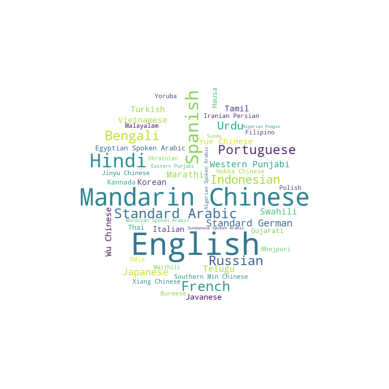

<Figure size 10000x10000 with 0 Axes>

In [28]:
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(100,100))
plt.show()